In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import os

# Load the iozone data
iozone_data = pd.read_csv('iozone_out.csv')
iozone_data = iozone_data.dropna()

# setting col names
iozone_data.columns = [
    "kB", "reclen", "write", "rewrite", "read", "reread",
    "random_read", "random_write", "bkwd_read", "record_rewrite", "stride_read",
    "fwrite", "frewrite", "fread", "freread"
]

# List of performance variables to plot
performance_vars = ['write', 'rewrite', 'read', 'reread', 'random_read', 'random_write']

# Ensure the 'results' directory exists
os.makedirs('results', exist_ok=True)

# Loop through each performance variable and create a 3D plot
for var in performance_vars:
    # Check if the variable exists in the iozone_dataset
    if var in iozone_data.columns:
        # Create a pivot table for the performance variable
        pivot_table = iozone_data.pivot_table(index='reclen', columns='kB', values=var)

        # Convert the pivot table to a numpy array
        Z = pivot_table.values

        # Create a meshgrid for plotting
        Y, X = np.meshgrid(pivot_table.columns, pivot_table.index)

        # Create the plot
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        # Surface plot
        surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

        # Set labels
        ax.set_ylabel('kB')
        ax.set_xlabel('Record Length (reclen)')
        ax.set_zlabel(f'{var.capitalize()} Throughput')

        # Show color bar
        fig.colorbar(surf)

        # Set title
        ax.set_title(f'{var.capitalize()} Performance')

        # Save the plot to the 'results' folder
        plot_filename = f'results/{var}_performance_plot.png'
        plt.savefig(plot_filename)

        # Close the plot to avoid memory issues
        plt.close(fig)

        print(f'Saved plot for {var} to {plot_filename}')

Saved plot for write to results/write_performance_plot.png
Saved plot for rewrite to results/rewrite_performance_plot.png
Saved plot for read to results/read_performance_plot.png
Saved plot for reread to results/reread_performance_plot.png
Saved plot for random_read to results/random_read_performance_plot.png
Saved plot for random_write to results/random_write_performance_plot.png


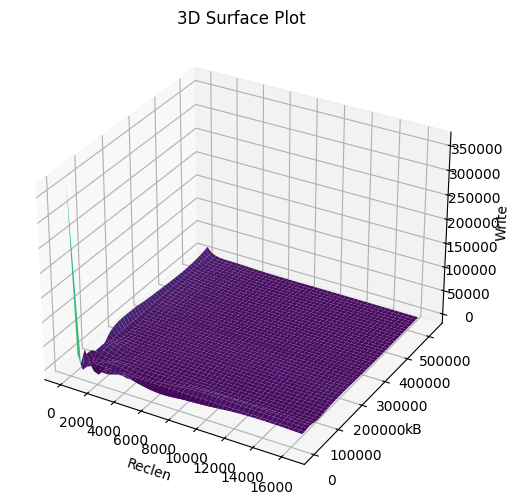

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Create a structured grid
xi = np.linspace(df['reclen'].min(), df['reclen'].max(), 50)
yi = np.linspace(df['kB'].min(), df['kB'].max(), 50)
X, Y = np.meshgrid(xi, yi)

# Interpolate Z values
Z = griddata((df['reclen'], df['kB']), df['write'], (X, Y), method='cubic')

# Create a 3D figure
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='viridis')

# Labels
ax.set_xlabel('Reclen')
ax.set_ylabel('kB')
ax.set_zlabel('Write')
ax.set_title('3D Surface Plot')

# Show the plot
plt.show()


In [12]:
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import os

# Load the iozone data
iozone_data = pd.read_csv('single_node.csv')
iozone_data = iozone_data.dropna()

# setting col names
iozone_data.columns = [
    "kB", "reclen", "write", "rewrite", "read", "reread",
    "random_read", "random_write", "bkwd_read", "record_rewrite", "stride_read",
    "fwrite", "frewrite", "fread", "freread"
]

# List of performance variables to plot
performance_vars = ['write', 'rewrite', 'read', 'reread', 'random_read', 'random_write']

# Ensure the 'results' directory exists
os.makedirs('results', exist_ok=True)

# Loop through each performance variable and create a 3D plot
for var in performance_vars:
    # Check if the variable exists in the iozone_dataset
    if var in iozone_data.columns:
        # Create a pivot table for the performance variable
        pivot_table = iozone_data.pivot_table(index='reclen', columns='kB', values=var)

        # Convert the pivot table to a numpy array
        Z = pivot_table.values

        # Create a meshgrid for plotting
        Y, X = np.meshgrid(pivot_table.columns, pivot_table.index)

        # Create the plot
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        # Surface plot
        surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

        # Set labels
        ax.set_ylabel('kB')
        ax.set_xlabel('Record Length (reclen)')
        ax.set_zlabel(f'{var.capitalize()} Throughput')

        # Show color bar
        fig.colorbar(surf)

        # Set title
        ax.set_title(f'{var.capitalize()} Performance')

        # Save the plot to the 'results' folder
        plot_filename = f'results/{var}_performance_plot.png'
        plt.savefig(plot_filename)

        # Close the plot to avoid memory issues
        plt.close(fig)

        print(f'Saved plot for {var} to {plot_filename}')

Saved plot for write to results/write_performance_plot.png
Saved plot for rewrite to results/rewrite_performance_plot.png
Saved plot for read to results/read_performance_plot.png
Saved plot for reread to results/reread_performance_plot.png
Saved plot for random_read to results/random_read_performance_plot.png
Saved plot for random_write to results/random_write_performance_plot.png


In [15]:
single_node = iozone_data[['reclen', 'kB', 'write']]
df = single_node

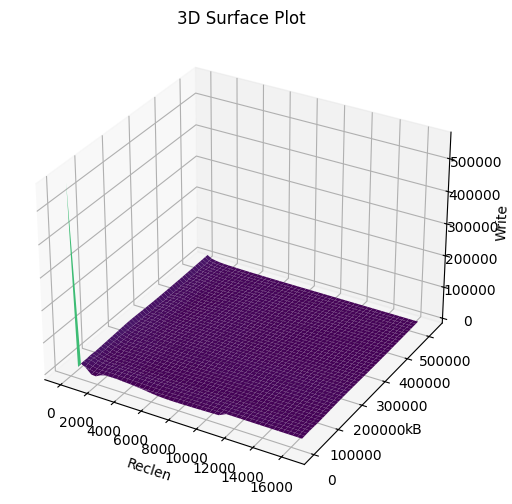

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Create a structured grid
xi = np.linspace(df['reclen'].min(), df['reclen'].max(), 50)
yi = np.linspace(df['kB'].min(), df['kB'].max(), 50)
X, Y = np.meshgrid(xi, yi)

# Interpolate Z values
Z = griddata((df['reclen'], df['kB']), df['write'], (X, Y), method='cubic')

# Create a 3D figure
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='viridis')

# Labels
ax.set_xlabel('Reclen')
ax.set_ylabel('kB')
ax.set_zlabel('Write')
ax.set_title('3D Surface Plot')

# Show the plot
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x13472e360>,
 'caps': [<matplotlib.lines.Line2D at 0x1345da7e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x134629eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1345db1d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1345db860>],
 'means': []}

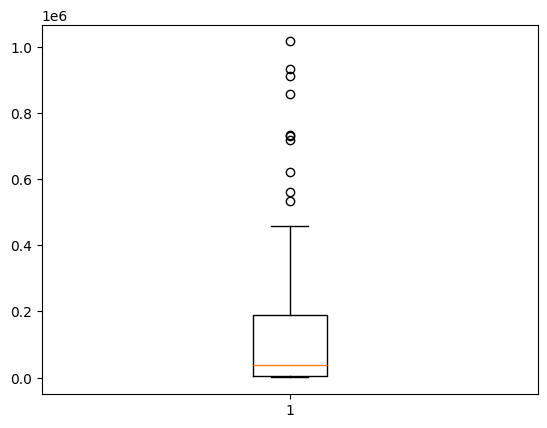

In [17]:
plt.boxplot(iozone_data['write'])